run avec le kernel py310_data_analysis
## exercice d'analyse de données 
données disponibles à l'adresse suivante : 

https://www.kaggle.com/datasets/spscientist/students-performance-in-exams

Variables utilisées pour cette exercice : 

    gender : 2 entrée, string
    race/ethnicity : 5 entrée, string
    parental level of education : 5 entrée, string
    lunch, 2 entrée, string
    test preparation course : 2 entrée, string,comparable à une boolean? 
    math score : sur une échelle de 1 à 100
    reading score : sur une échelle de 1 à 100
    writing score : sur une échelle de 1 à 100
    
effectif : 1000 individus


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats.contingency import association

In [2]:
#définir l'accès, lecture du fichier
path = 'data/StudentsPerformance.csv'
sperf = pd.read_csv(path)
sperf.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
#nb lignes et colonnes dans le tableau 
sperf.shape

(1000, 8)

inspection des données : résultats aux épreuves

In [4]:
#variable des résultats des diverses branches. 
prep = sperf ['test preparation course']
maths = sperf['math score']
reading = sperf ['reading score']
writing = sperf ['writing score']

type(maths), maths.head()

(pandas.core.series.Series,
 0    72
 1    69
 2    90
 3    47
 4    76
 Name: math score, dtype: int64)

<Axes: >

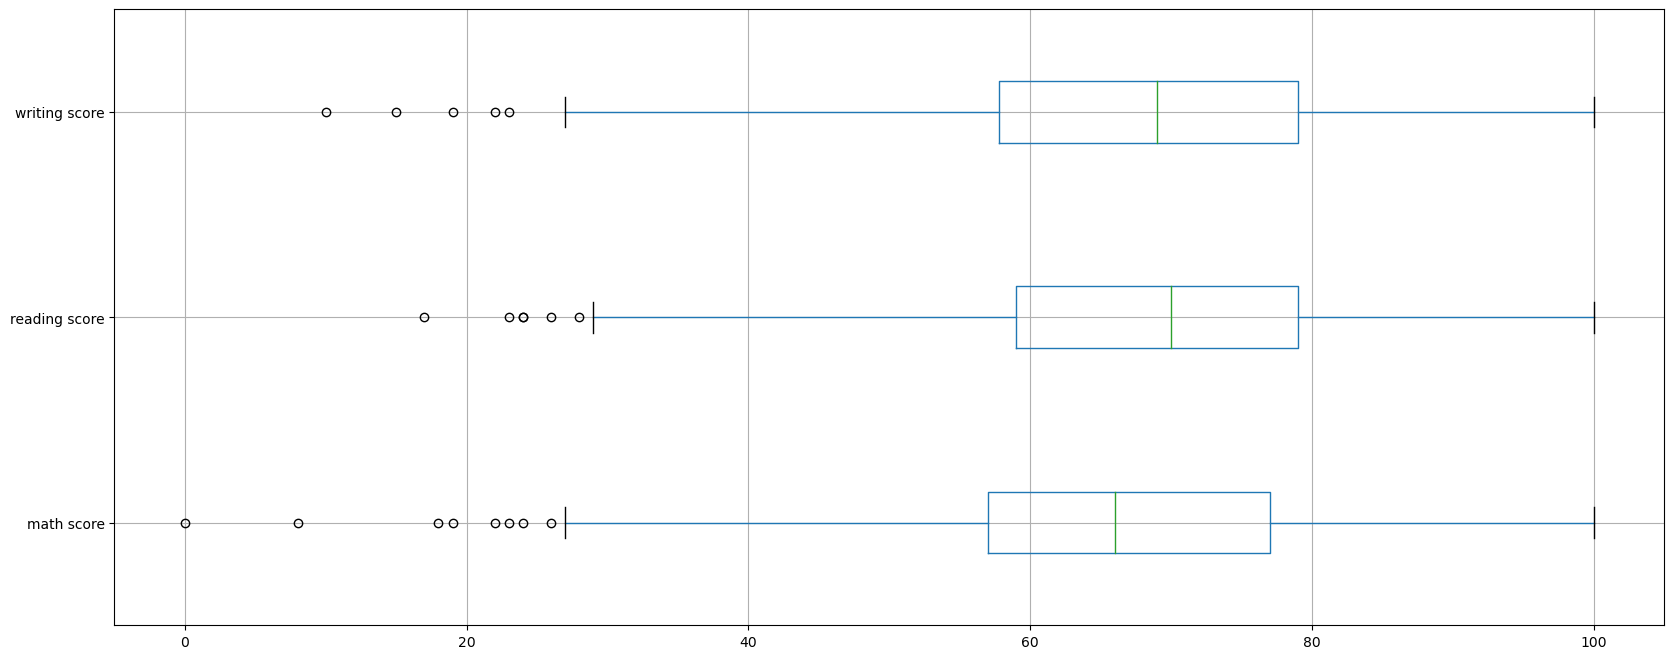

In [5]:
### représentation de données : les résultats de différentes branches dans des boites à moustache.
# ainsi on repérera la moyenne et les outliers. 

sperf.boxplot(column=['math score', 'reading score', 'writing score'], vert=False, figsize=(20,8))

première analyse : les scores sont relativement similaires. La majorité des résultats se trouvent entre 60 et 80 points. Le score de math est le plus bas relativement aux autres branches. Les pires scores se trouvent en math.

étude quantitative des résultats de la cohorte en math. 

In [6]:
#  tri par leur score en math, descendant
s_maths = maths.sort_values() 
s_maths.head()

59      0
980     8
17     18
787    19
145    22
Name: math score, dtype: int64

In [7]:
# Regrouper par score de math et compter les individus par valeur
cs_maths = s_maths.groupby(s_maths).count()
print(type(cs_maths))
cs_maths.head()

<class 'pandas.core.series.Series'>


math score
0     1
8     1
18    1
19    1
22    1
Name: math score, dtype: int64

In [8]:
# Transformer la serie en dataFrame
df_cs_maths = pd.DataFrame(cs_maths)
print(type(df_cs_maths))
df_cs_maths.head()

<class 'pandas.core.frame.DataFrame'>


,math score
math score,
0,1
8,1
18,1
19,1
22,1


In [9]:
 # copie indépendante de la dataframe
 # distribution des scores de math en groupe de 1-10. 
score = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 101]
c_sperf = sperf.copy(deep=True)
c_sperf['score'] = pd.cut(c_sperf['math score'], score, right=False)
c_sperf['score'] = c_sperf['score'].apply(lambda x : str(int(x.left))+'-'+ str(int(x.right)-1))
c_sperf.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,score
0,female,group B,bachelor's degree,standard,none,72,72,74,70-79
1,female,group C,some college,standard,completed,69,90,88,60-69
2,female,group B,master's degree,standard,none,90,95,93,90-100
3,male,group A,associate's degree,free/reduced,none,47,57,44,40-49
4,male,group C,some college,standard,none,76,78,75,70-79
5,female,group B,associate's degree,standard,none,71,83,78,70-79
6,female,group B,some college,standard,completed,88,95,92,80-89
7,male,group B,some college,free/reduced,none,40,43,39,40-49
8,male,group D,high school,free/reduced,completed,64,64,67,60-69
9,female,group B,high school,free/reduced,none,38,60,50,30-39


In [10]:
# en format groupby
gb_score = pd.DataFrame(c_sperf.groupby('score').size())
gb_score.columns = ['score']
gb_score

,score
score,
0-9,2
10-19,2
20-29,10
30-39,26
40-49,95
50-59,188
60-69,268
70-79,216
80-89,135


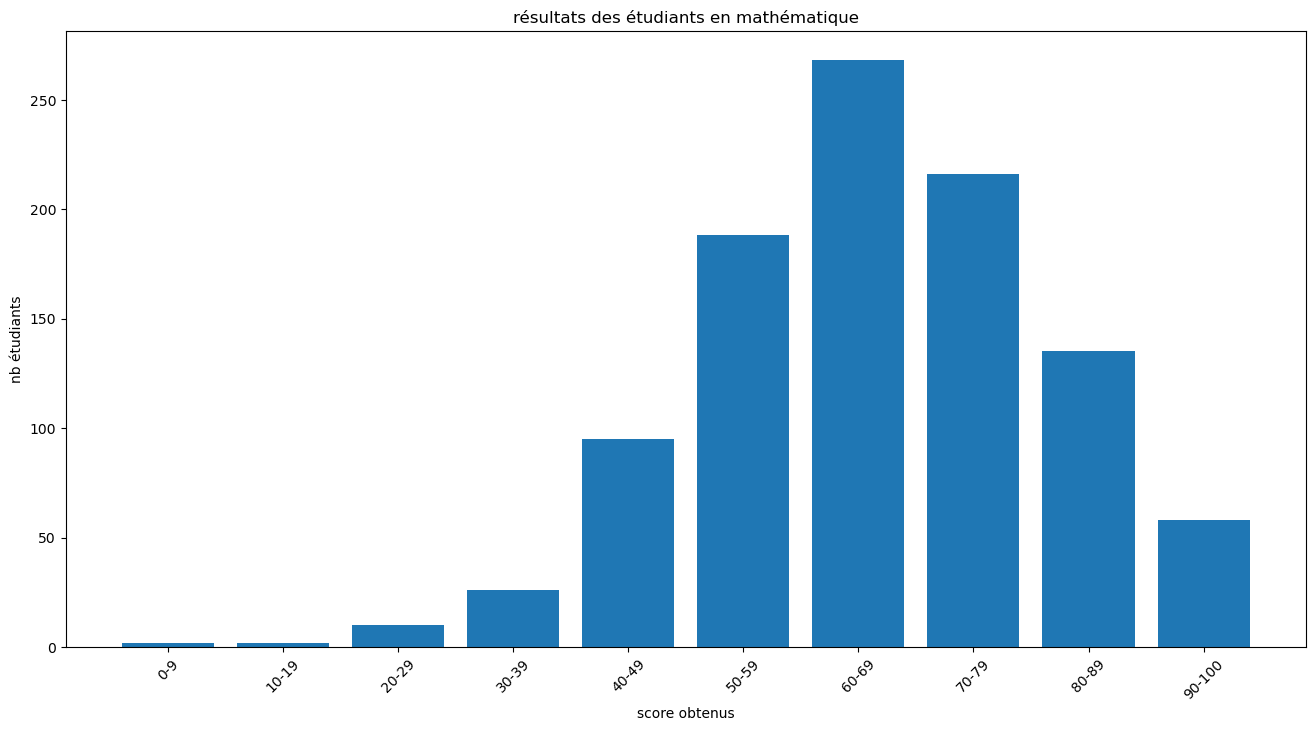

In [11]:
# Diagramme à barre

objects = [l for l in gb_score.index]
eff = [l for l in gb_score['score']]

p1 = plt.bar(objects, eff)

plt.ylabel('nb étudiants')
plt.xlabel ('score obtenus')
plt.title("résultats des étudiants en mathématique")
plt.gcf().set_size_inches(16, 8)
plt.xticks(rotation=45)
plt.show()

In [12]:
# résultat cumulé en math

gb_score['mathScore_cumule'] = gb_score['score'].cumsum()
gb_score

,score,mathScore_cumule
score,,
0-9,2,2
10-19,2,4
20-29,10,14
30-39,26,40
40-49,95,135
50-59,188,323
60-69,268,591
70-79,216,807
80-89,135,942


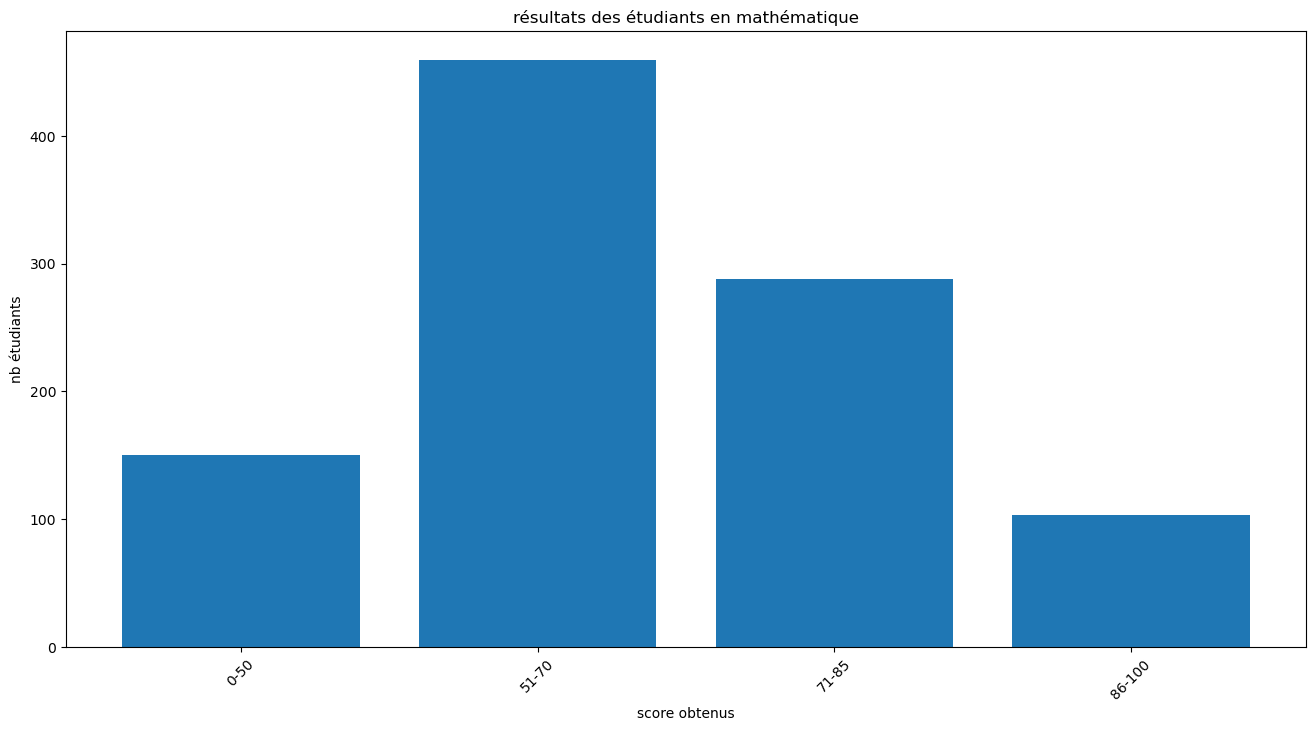

In [13]:
 # création de colonne par appréciation supposée : 0-50 = insuffisant, 51-70 = suffisant, 71-85 = bon, 86+ = excellent
appreciation = [0, 51, 71, 86, 101]
cc_sperf = sperf.copy(deep=True)
cc_sperf['appreciation'] = pd.cut(cc_sperf['math score'], appreciation, right=False)
cc_sperf['appreciation'] = cc_sperf['appreciation'].apply(lambda x : str(int(x.left))+'-'+ str(int(x.right)-1))

gb_appreciation = pd.DataFrame(cc_sperf.groupby('appreciation').size())
gb_appreciation.columns = ['appreciation']

# Diagramme à barre

objects = [l for l in gb_appreciation.index]
eff = [l for l in gb_appreciation['appreciation']]

p1 = plt.bar(objects, eff)

plt.ylabel('nb étudiants')
plt.xlabel ('score obtenus')
plt.title("résultats des étudiants en mathématique")
plt.gcf().set_size_inches(16, 8)
plt.xticks(rotation=45)
plt.show()

In [14]:
gb_appreciation['mathScore_cumule'] = gb_appreciation['appreciation'].cumsum()
gb_appreciation

,appreciation,mathScore_cumule
appreciation,,
0-50,150,150
51-70,459,609
71-85,288,897
86-100,103,1000


In [15]:
### même démarche, mais avec le niveau d'éducation des parents --> étude qualitative
# dataframe d'effectif, par niveau d'éducation des parents

gb_parent = sperf.groupby('parental level of education').size()
sgb_parent = gb_parent.sort_values(ascending = True)

# definition d'un code pour chaque niveau d'education et tri selon ce code
df_parent = pd.DataFrame(sgb_parent, columns=['effectif'])
df_parent.reset_index(inplace=True)
df_parent['code_education'] = [6,5,2,1,3,4]
df_parent.sort_values('code_education', inplace=True)
df_parent

,parental level of education,effectif,code_education
3,high school,196,1
2,some high school,179,2
4,associate's degree,222,3
5,some college,226,4
1,bachelor's degree,118,5
0,master's degree,59,6


In [16]:
# effectif cumulé
# puisque les effectifs se font sur mille, le calcul de fréquence sous forme de pourcentage ne rendrait aucune nouvelle information visible
df_parent['effectif_cumule'] = df_parent['effectif'].cumsum()
df_parent

,parental level of education,effectif,code_education,effectif_cumule
3,high school,196,1,196
2,some high school,179,2,375
4,associate's degree,222,3,597
5,some college,226,4,823
1,bachelor's degree,118,5,941
0,master's degree,59,6,1000


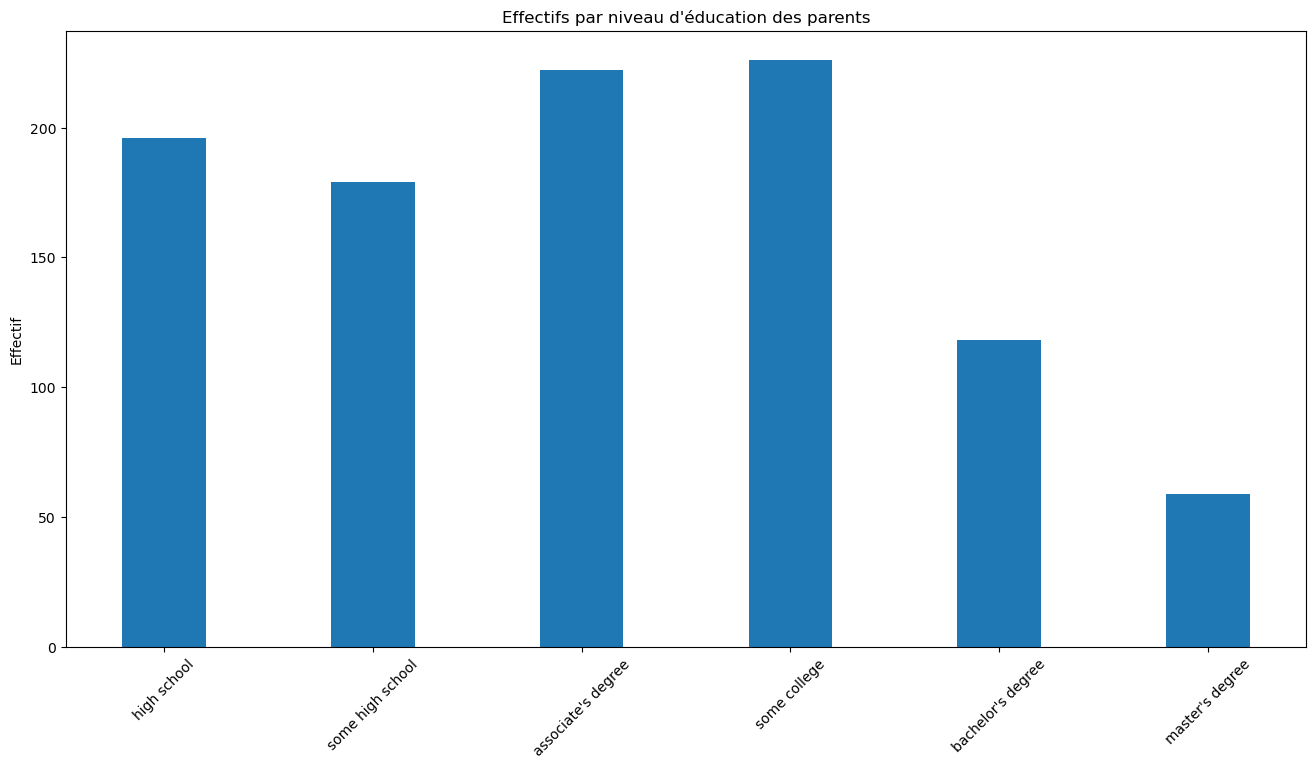

In [17]:
# Distribution par niveau d'éducation des parents : représentation en diagramme à barres

objects = [l for l in df_parent['parental level of education']]
eff = [l for l in df_parent['effectif']]

objects = [l for l in df_parent.sort_values('code_education')['parental level of education']]
eff = [l for l in df_parent.sort_values('code_education')['effectif']]


p1 = plt.bar(objects, eff, width=0.4)

#plt.xticks(l5Years)
plt.ylabel('Effectif')
plt.title("Effectifs par niveau d'éducation des parents")
plt.gcf().set_size_inches(16, 8)
plt.xticks(rotation=45)
plt.show()

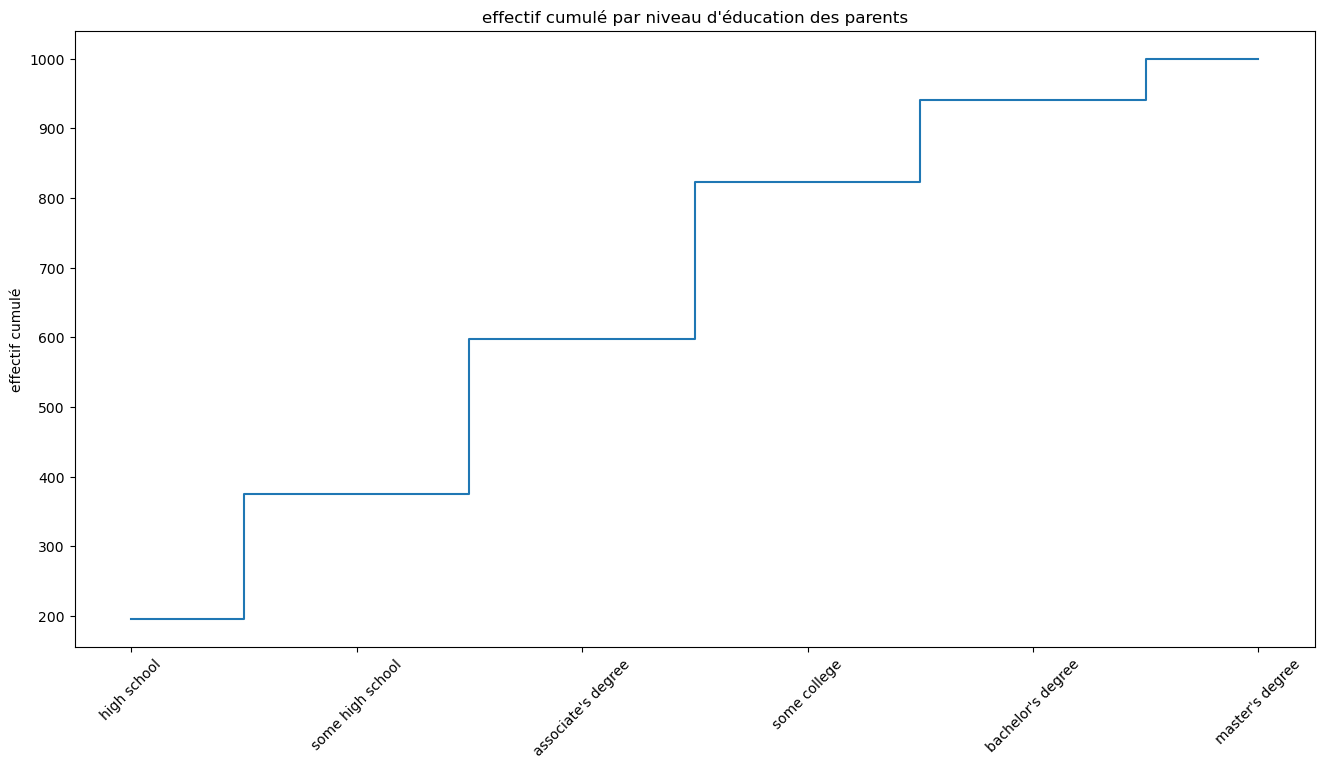

In [18]:
# résultat cumulatif pour le niveau d'éducation des parents

objects = [l for l in df_parent.index]
eff = [l for l in df_parent.values]

objects = [l for l in df_parent['parental level of education']]
eff = [l for l in df_parent['effectif_cumule']]

p1 = plt.plot(objects, eff, drawstyle='steps-mid')

#plt.xticks(l5Years)
plt.ylabel('effectif cumulé')
plt.title("effectif cumulé par niveau d'éducation des parents")
plt.gcf().set_size_inches(16, 8)
plt.xticks(rotation=45)
plt.show()

In [19]:
# visualisation des données ethniques

gb_ethnie = sperf.groupby('race/ethnicity').size()
df_ethnie = pd.DataFrame(gb_ethnie, columns=['effectif'])
df_ethnie.reset_index(inplace=True)
df_ethnie['effectif_cumule'] = df_ethnie['effectif'].cumsum()
df_ethnie

,race/ethnicity,effectif,effectif_cumule
0,group A,89,89
1,group B,190,279
2,group C,319,598
3,group D,262,860
4,group E,140,1000


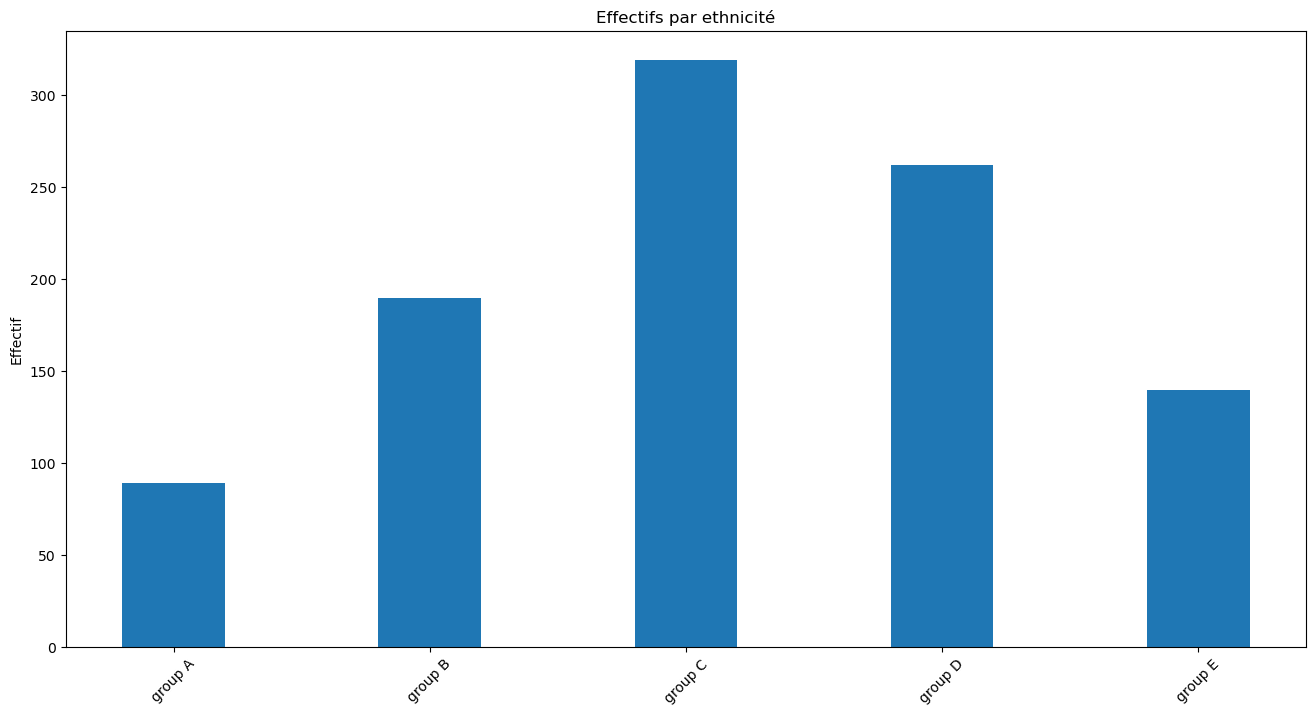

In [20]:
#  représentation en diagramme à barres

objects = [l for l in df_ethnie['race/ethnicity']]
eff = [l for l in df_ethnie['effectif']]

# objects = [l for l in df_ethnie.sort_values('code_education')['parental level of education']]
# eff = [l for l in df_ethnie.sort_values('code_education')['effectif']]


p1 = plt.bar(objects, eff, width=0.4)

#plt.xticks(l5Years)
plt.ylabel('Effectif')
plt.title("Effectifs par ethnicité")
plt.gcf().set_size_inches(16, 8)
plt.xticks(rotation=45)
plt.show()

# Analyse bivariée 

In [21]:
c_sperf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   gender                       1000 non-null   object  
 1   race/ethnicity               1000 non-null   object  
 2   parental level of education  1000 non-null   object  
 3   lunch                        1000 non-null   object  
 4   test preparation course      1000 non-null   object  
 5   math score                   1000 non-null   int64   
 6   reading score                1000 non-null   int64   
 7   writing score                1000 non-null   int64   
 8   score                        1000 non-null   category
dtypes: category(1), int64(3), object(5)
memory usage: 64.0+ KB


In [22]:
c_sperf.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,score
0,female,group B,bachelor's degree,standard,none,72,72,74,70-79
1,female,group C,some college,standard,completed,69,90,88,60-69
2,female,group B,master's degree,standard,none,90,95,93,90-100
3,male,group A,associate's degree,free/reduced,none,47,57,44,40-49
4,male,group C,some college,standard,none,76,78,75,70-79


In [23]:
print(c_sperf.columns.tolist())

['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score', 'writing score', 'score']


In [24]:
type(c_sperf)

pandas.core.frame.DataFrame

In [25]:
c_sperf.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,score
0,female,group B,bachelor's degree,standard,none,72,72,74,70-79
1,female,group C,some college,standard,completed,69,90,88,60-69
2,female,group B,master's degree,standard,none,90,95,93,90-100
3,male,group A,associate's degree,free/reduced,none,47,57,44,40-49
4,male,group C,some college,standard,none,76,78,75,70-79


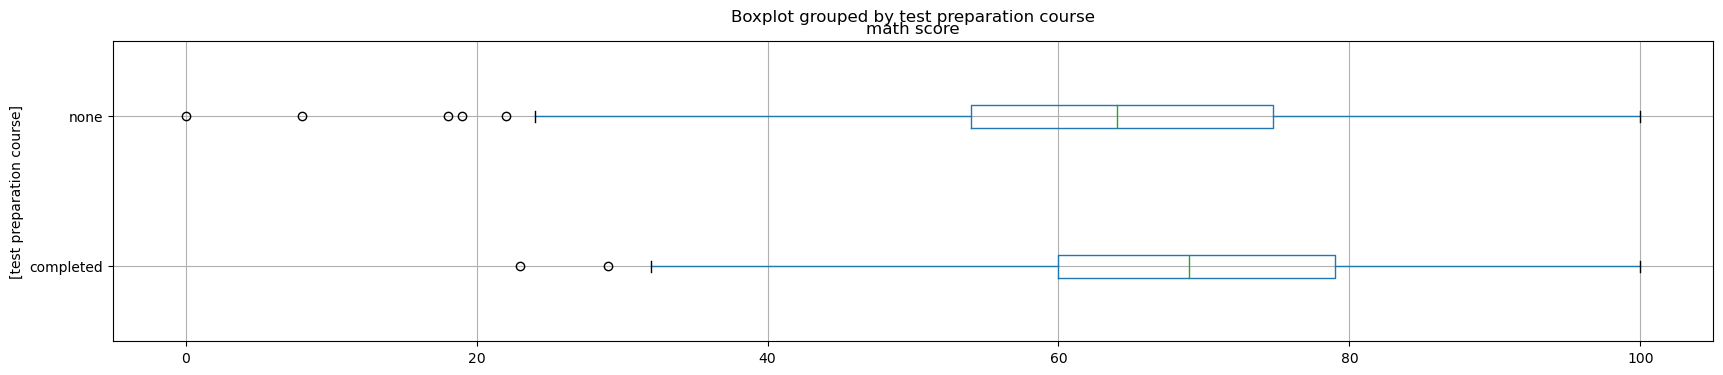

In [26]:
# visualisation en boxplot des résultats en math, séparé entre les effectifs qui ont participé au test de préparation et les autres.
c_sperf.boxplot(column=['math score'], by=['test preparation course'], vert=False, figsize=(20,4),)
plt.show()

les boxplots ne s'affichent plus? il n'y a pas de message d'erreur

In [27]:
df_parent

,parental level of education,effectif,code_education,effectif_cumule
3,high school,196,1,196
2,some high school,179,2,375
4,associate's degree,222,3,597
5,some college,226,4,823
1,bachelor's degree,118,5,941
0,master's degree,59,6,1000


In [28]:
### deux variables qualitatives : niveau d'éducation des parents et groupe ethnique
# tableau de contingence education des parents et groupe ethnique

X = "parental level of education"
Y = "race/ethnicity"

c_sperf_parent_ethnie = c_sperf[[Y,X]].pivot_table(index=Y,columns=X,aggfunc=len,margins=True,margins_name="Total").fillna(0).astype(int)
c_sperf_parent_ethnie

parental level of education,associate's degree,bachelor's degree,high school,master's degree,some college,some high school,Total
race/ethnicity,,,,,,,
group A,14,12,18,3,18,24,89
group B,41,20,48,6,37,38,190
group C,78,40,64,19,69,49,319
group D,50,28,44,23,67,50,262
group E,39,18,22,8,35,18,140
Total,222,118,196,59,226,179,1000


In [29]:
#réorganiser les colonnes
parent_ethnie = c_sperf_parent_ethnie[["high school","some high school","associate's degree","some college","bachelor's degree","master's degree"]]
parent_ethnie.head()

parental level of education,high school,some high school,associate's degree,some college,bachelor's degree,master's degree
race/ethnicity,,,,,,
group A,18,24,14,18,12,3
group B,48,38,41,37,20,6
group C,64,49,78,69,40,19
group D,44,50,50,67,28,23
group E,22,18,39,35,18,8


In [30]:
#fréquence 
c_sperf_parent_ethnie_frequence = np.round(parent_ethnie*100/parent_ethnie.iloc[-1,-1],1)
c_sperf_parent_ethnie_frequence

parental level of education,high school,some high school,associate's degree,some college,bachelor's degree,master's degree
race/ethnicity,,,,,,
group A,30.5,40.7,23.7,30.5,20.3,5.1
group B,81.4,64.4,69.5,62.7,33.9,10.2
group C,108.5,83.1,132.2,116.9,67.8,32.2
group D,74.6,84.7,84.7,113.6,47.5,39.0
group E,37.3,30.5,66.1,59.3,30.5,13.6
Total,332.2,303.4,376.3,383.1,200.0,100.0


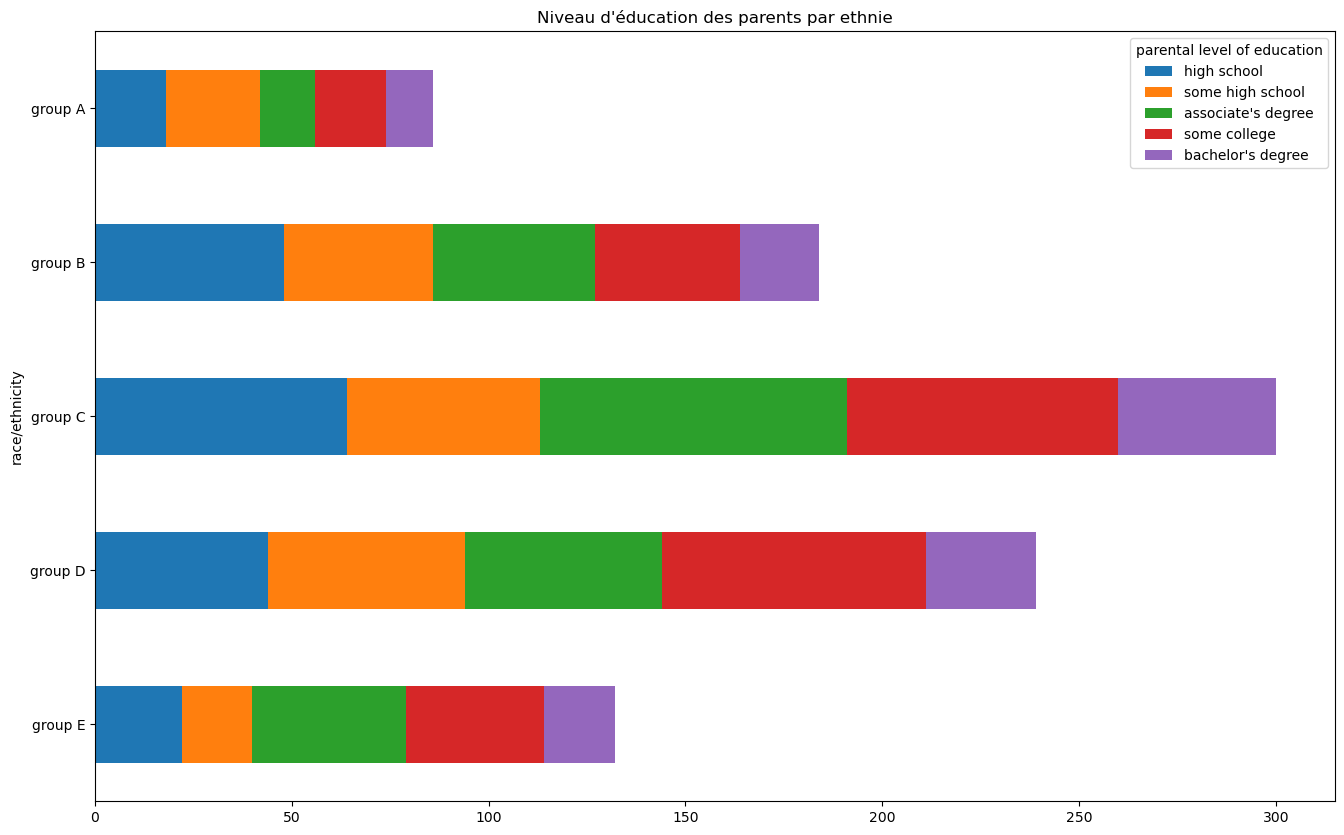

In [32]:
## Effectifs des niveaux d'éducation des parents par ethnie
# j'aimerais pouvoir trier ces niveaux d'éducation de façon à obtenir une idée plus clair des bac+x.
# pouvoir placer Bachelor et Master l'un à coté de l'autre donnerait une meilleure appréciation de ces colonnes.
# ainsi, avoir un extrême "haute éducation" d'un coté et "basse éducation" de l'autre serait plus pertinent. 
# pas sûr de comment réarranger c_sperf sans que ca soit un bordel monstre. 
g = parent_ethnie.iloc[:-1, :-1].sort_index(ascending=False)\
        .plot( kind='barh', stacked=True,  figsize=(16,10),  title = "Niveau d'éducation des parents par ethnie")
plt.show()

In [33]:
# pourcentages des lignes
stacked_data_lignes = parent_ethnie.apply(lambda x: (x*100/sum(x)*2).round(2), axis=1) # axis=0
stacked_data_lignes

parental level of education,high school,some high school,associate's degree,some college,bachelor's degree,master's degree
race/ethnicity,,,,,,
group A,40.45,53.93,31.46,40.45,26.97,6.74
group B,50.53,40.00,43.16,38.95,21.05,6.32
group C,40.13,30.72,48.90,43.26,25.08,11.91
group D,33.59,38.17,38.17,51.15,21.37,17.56
group E,31.43,25.71,55.71,50.00,25.71,11.43
Total,39.20,35.80,44.40,45.20,23.60,11.80


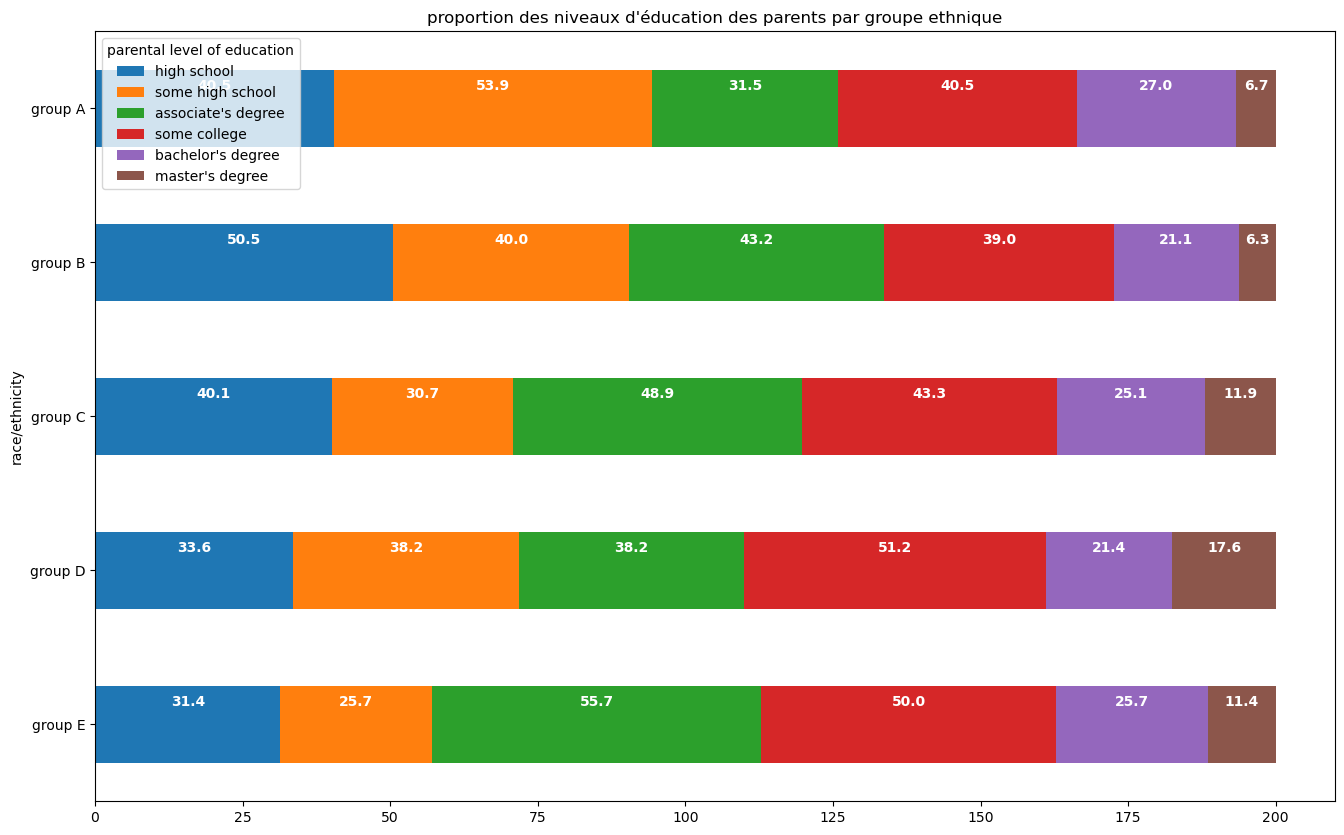

In [34]:
#visualisation des pourcentages
z = stacked_data_lignes.iloc[:-1, :].sort_index(ascending=False).plot(kind="barh", stacked=True, figsize=(16,10), title="proportion des niveaux d'éducation des parents par groupe ethnique")

for p in z.patches:
    b = p.get_bbox()
    y_value=b.y1-b.y0
    z.annotate(format(p.get_width(), '.1f'), 
                   (p.get_x() + p.get_width()/2, p.get_y() + p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=10,
                   # style = 'italic',
                   weight='bold',
                   color = 'white',
                   xytext = (0, -12), 
                   textcoords = 'offset points')
plt.show()

Coeff. de Pearsons: 0.9546


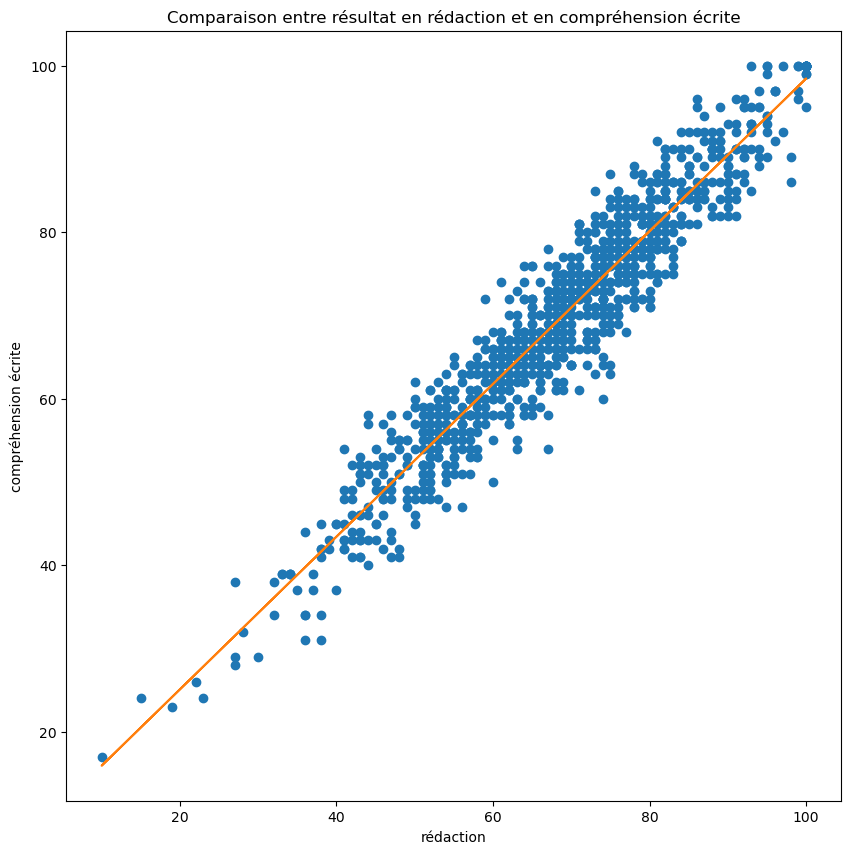

In [35]:
x = np.array(c_sperf['writing score'])
y = np.array(c_sperf['reading score'])



plt.rcParams["figure.figsize"] = [10,10]

plt.plot(x, y, 'o')
plt.ylabel('compréhension écrite')
plt.xlabel ('rédaction')
plt.title("Comparaison entre résultat en rédaction et en compréhension écrite")


# m = slope, b=intercept
m, b = np.polyfit(x, y, 1)

plt.plot(x, m*x + b)

print('Coeff. de Pearsons: {}'.format(np.corrcoef([x,y])[1][0].round(4)))
plt.show()

In [36]:
np.corrcoef([x,y])[1][0].round(4)

0.9546